In [1]:
print("hello gabbu")

hello gabbu


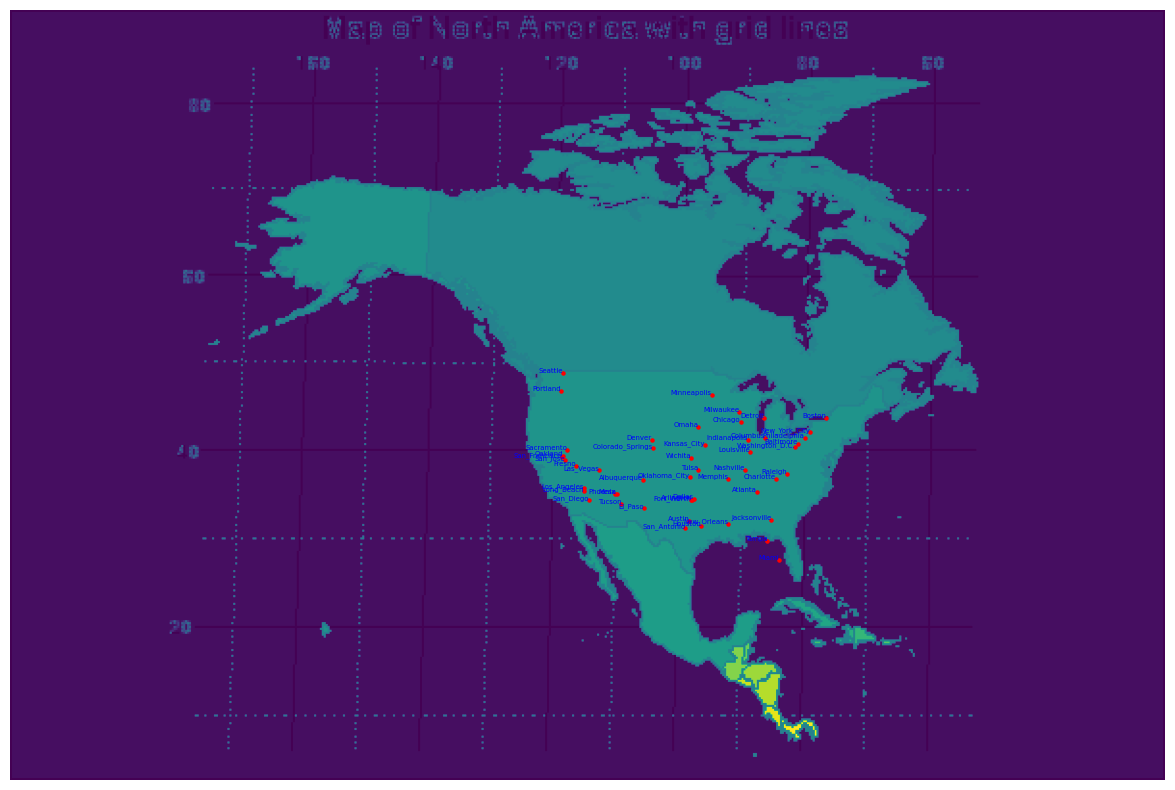

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Read the text file with city names and coordinates
file_path = 'Ame_city_dataset.txt'  # Replace with your text file path
df = pd.read_csv(file_path)

# Step 2: Load the high-resolution world map
map_path = 'zoomed_image2.png'  # Replace with your map image path
world_map = Image.open(map_path)

# Convert the map to numpy array for plotting
world_map_np = np.array(world_map)

# Step 3: Plot the points on the map
plt.figure(figsize=(15, 10))
plt.imshow(world_map_np)

# Convert latitude and longitude to pixel coordinates
def lat_lon_to_pixels(lat, lon, map_width, map_height):
    # These transformations may need to be adjusted based on the map projection
    x = (lon + 230) * (map_width*1.6 / 360)
    y = (90 - lat) * (map_height / 180)
    return int(x), int(y)

# Get the dimensions of the map
map_width, map_height = world_map.size

# Plot each city
for index, row in df.iterrows():
    city = row['city_name']
    lat = row['latitude']
    lon = row['longitude']
    x, y = lat_lon_to_pixels(lat, lon,map_width, map_height*2)
    
    # Plot the point
    plt.scatter(x, y,color = 'red',s = 5)  # 'ro' stands for red dot
    plt.text(x, y, city, fontsize=5, ha='right', color='blue')

plt.axis('off')  # Turn off the axis
plt.show()
